In [1]:
import tensorflow as tf

Init Plugin
Init Graph Optimizer
Init Kernel


In [2]:
from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.models import Sequential

In [3]:
tf.__version__

'2.5.0'

In [4]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, accuracy_score
from sklearn.utils import class_weight

In [6]:
from tqdm import tqdm
from sklearn import model_selection
from sklearn.model_selection import train_test_split, learning_curve,KFold,cross_val_score,StratifiedKFold
from sklearn.utils import class_weight
from sklearn.metrics import confusion_matrix

In [7]:
import matplotlib.pyplot as plt

In [8]:
from glob import glob

In [9]:
import matplotlib.pyplot as plt
import random
import pandas as pd
import numpy as np
import matplotlib.gridspec as gridspec
import seaborn as sns
import zlib
import itertools
import sklearn
import itertools
import scipy
import skimage
from skimage.transform import resize

In [10]:
import numpy as np
batch_size = 64
from skimage import io

imageSize = 64
target_dims = (imageSize, imageSize, 3)
num_classes = 29

train_len = 87000
train_dir ='/Users/napolean/Downloads/ASL_alphabet/asl_alphabet_train/asl_alphabet_train/'

def get_data(folder):
    X = np.empty((train_len, imageSize, imageSize, 3), dtype=np.float32)
    y = np.empty((train_len,), dtype=np.int)
    cnt = 0
    for folderName in os.listdir(folder):
        if not folderName.startswith('.'):
            if folderName in ['A']:
                label = 0
            elif folderName in ['B']:
                label = 1
            elif folderName in ['C']:
                label = 2
            elif folderName in ['D']:
                label = 3
            elif folderName in ['E']:
                label = 4
            elif folderName in ['F']:
                label = 5
            elif folderName in ['G']:
                label = 6
            elif folderName in ['H']:
                label = 7
            elif folderName in ['I']:
                label = 8
            elif folderName in ['J']:
                label = 9
            elif folderName in ['K']:
                label = 10
            elif folderName in ['L']:
                label = 11
            elif folderName in ['M']:
                label = 12
            elif folderName in ['N']:
                label = 13
            elif folderName in ['O']:
                label = 14
            elif folderName in ['P']:
                label = 15
            elif folderName in ['Q']:
                label = 16
            elif folderName in ['R']:
                label = 17
            elif folderName in ['S']:
                label = 18
            elif folderName in ['T']:
                label = 19
            elif folderName in ['U']:
                label = 20
            elif folderName in ['V']:
                label = 21
            elif folderName in ['W']:
                label = 22
            elif folderName in ['X']:
                label = 23
            elif folderName in ['Y']:
                label = 24
            elif folderName in ['Z']:
                label = 25
            elif folderName in ['del']:
                label = 26
            elif folderName in ['nothing']:
                label = 27
            elif folderName in ['space']:
                label = 28           
            else:
                label = 29
            for image_filename in os.listdir(folder + folderName):
                img_file = io.imread(folder + folderName +'/'+ image_filename,plugin='matplotlib')
                if img_file is not None:
                    img_file = skimage.transform.resize(img_file, (imageSize, imageSize, 3))
                    img_arr = np.asarray(img_file).reshape((-1, imageSize, imageSize, 3))
                    
                    X[cnt] = img_arr
                    y[cnt] = label
                    cnt += 1
    return X,y
X_train, y_train = get_data(train_dir)

KeyboardInterrupt: 

In [ ]:
X_train.shape

(87000, 64, 64, 3)

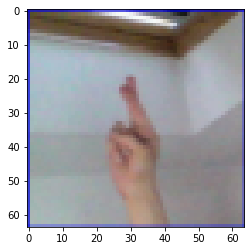

In [ ]:
plt.imshow(X_train[789])
plt.show()

In [ ]:
y_train[789]

17

In [ ]:
#making copies of original data
X_data = X_train
y_data = y_train

In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test= train_test_split(X_data,y_data,test_size=0.25,random_state=23,stratify=y_data)

In [ ]:
from tensorflow.keras.utils import to_categorical
#one_hot_encoding
y_cat_train = to_categorical(y_train,29)
y_cat_test = to_categorical(y_test,29)

In [ ]:
print(X_train.shape)
print(y_train.shape)
print(X_test.shape)
print(y_test.shape)
print(y_cat_train.shape)
print(y_cat_test.shape)

(65250, 64, 64, 3)
(65250,)
(21750, 64, 64, 3)
(21750,)
(65250, 29)
(21750, 29)


In [ ]:
model = Sequential([
    layers.Conv2D(filters = 32,kernel_size = (5,5),activation='relu',input_shape = (64,64,3)),
    layers.MaxPooling2D((2,2)), 
    layers.Conv2D(filters =64,kernel_size = (3,3),activation='relu'),
    layers.MaxPooling2D((2,2)),
    layers.Conv2D(filters =64,kernel_size = (3,3),activation='relu'),
    layers.MaxPooling2D((2,2)),
    layers.Flatten(),
    layers.Dense(128,activation='relu'),
    layers.Dense(29,activation ='softmax')
    ])
model.summary()

Metal device set to: Apple M1


2021-07-07 13:51:15.763199: I tensorflow/core/common_runtime/pluggable_device/pluggable_device_factory.cc:305] Could not identify NUMA node of platform GPU ID 0, defaulting to 0. Your kernel may not have been built with NUMA support.
2021-07-07 13:51:15.781552: I tensorflow/core/common_runtime/pluggable_device/pluggable_device_factory.cc:271] Created TensorFlow device (/job:localhost/replica:0/task:0/device:GPU:0 with 0 MB memory) -> physical PluggableDevice (device: 0, name: METAL, pci bus id: <undefined>)


Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 60, 60, 32)        2432      
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 30, 30, 32)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 28, 28, 64)        18496     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 14, 14, 64)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 12, 12, 64)        36928     
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 6, 6, 64)          0         
_________________________________________________________________
flatten (Flatten)            (None, 2304)              0

In [ ]:
from tensorflow.keras.callbacks import EarlyStopping
early_stop = EarlyStopping(monitor='val_loss',patience=2)



In [ ]:
model.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy'])


In [ ]:
model.fit(X_train,y_cat_train,epochs = 50,batch_size = 64,verbose = 2, validation_data=(X_test,y_cat_test),callbacks=[early_stop])

2021-07-07 13:51:17.116932: I tensorflow/compiler/mlir/mlir_graph_optimization_pass.cc:176] None of the MLIR Optimization Passes are enabled (registered 2)
2021-07-07 13:51:17.145090: W tensorflow/core/platform/profile_utils/cpu_utils.cc:128] Failed to get CPU frequency: 0 Hz


Epoch 1/50


2021-07-07 13:51:24.594602: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:112] Plugin optimizer for device_type GPU is enabled.
2021-07-07 13:51:55.555890: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:112] Plugin optimizer for device_type GPU is enabled.


1020/1020 - 42s - loss: 1.0221 - accuracy: 0.6965 - val_loss: 0.2104 - val_accuracy: 0.9364
Epoch 2/50
1020/1020 - 38s - loss: 0.1299 - accuracy: 0.9589 - val_loss: 0.1026 - val_accuracy: 0.9679
Epoch 3/50
1020/1020 - 49s - loss: 0.0682 - accuracy: 0.9788 - val_loss: 0.0608 - val_accuracy: 0.9804
Epoch 4/50
1020/1020 - 40s - loss: 0.0453 - accuracy: 0.9863 - val_loss: 0.0811 - val_accuracy: 0.9751
Epoch 5/50
1020/1020 - 52s - loss: 0.0400 - accuracy: 0.9875 - val_loss: 0.0282 - val_accuracy: 0.9916
Epoch 6/50
1020/1020 - 54s - loss: 0.0340 - accuracy: 0.9897 - val_loss: 0.0351 - val_accuracy: 0.9886
Epoch 7/50
1020/1020 - 62s - loss: 0.0227 - accuracy: 0.9934 - val_loss: 0.0261 - val_accuracy: 0.9921
Epoch 8/50
1020/1020 - 55s - loss: 0.0273 - accuracy: 0.9922 - val_loss: 0.0255 - val_accuracy: 0.9922
Epoch 9/50


In [ ]:
import pandas as pd
metrics = pd.DataFrame(model.history.history)
print("The model metrics are")
metrics

The model metrics are


,loss,accuracy,val_loss,val_accuracy
0,0.952478,0.715326,0.240641,0.917379
1,0.139554,0.954376,0.111603,0.961931
2,0.068044,0.978238,0.065015,0.978161
3,0.050029,0.983877,0.045959,0.986023
4,0.035574,0.988889,0.041585,0.987448
5,0.029505,0.990759,0.036205,0.987678
6,0.026782,0.991694,0.040950,0.987908
7,0.024023,0.992506,0.039745,0.989839


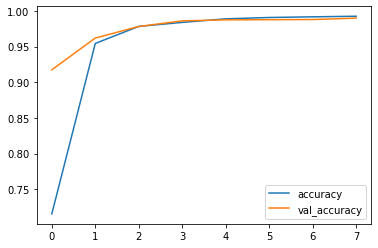

In [ ]:
metrics[['accuracy','val_accuracy']].plot()
plt.show()


In [ ]:
model.evaluate(X_test,y_cat_test,verbose=0)

[0.03974517807364464, 0.9898390769958496]

In [ ]:
predictions = model.predict_classes(X_test)
print("Predictions done...")

/Users/napolean/miniforge3/envs/tf/lib/python3.9/site-packages/keras/engine/sequential.py:450: UserWarning: `model.predict_classes()` is deprecated and will be removed after 2021-01-01. Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).
  warnings.warn('`model.predict_classes()` is deprecated and '
2021-07-06 22:52:58.467386: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:112] Plugin optimizer for device_type GPU is enabled.


Predictions done...


In [ ]:
from sklearn.metrics import classification_report, confusion_matrix
print(classification_report(y_test,predictions))

              precision    recall  f1-score   support

           0       0.98      1.00      0.99       750
           1       0.99      1.00      1.00       750
           2       0.99      0.99      0.99       750
           3       0.99      1.00      0.99       750
           4       0.99      0.98      0.98       750
           5       1.00      1.00      1.00       750
           6       1.00      0.99      0.99       750
           7       1.00      1.00      1.00       750
           8       1.00      0.97      0.99       750
           9       1.00      1.00      1.00       750
          10       1.00      0.98      0.99       750
          11       1.00      1.00      1.00       750
          12       1.00      0.99      1.00       750
          13       1.00      0.99      0.99       750
          14       0.99      0.98      0.99       750
          15       1.00      0.92      0.96       750
          16       0.88      1.00      0.93       750
          17       1.00    